<a href="https://colab.research.google.com/github/s26633/2526Z_wzs_POSI_MON1_11_s26633/blob/main/Cwiczenia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 5

## Wprowadzenie

### Regresja logistyczna

**Regresja logistyczna** to model statystyczny używany do przewidywania
prawdopodobieństwa zajścia zdarzenia (np. $ Y = 1 $) na podstawie jednej lub wielu
zmiennych objaśniających $$ X_1, X_2, \ldots, X_n $$

W przeciwieństwie do regresji liniowej, regresja logistyczna modeluje prawdopodobieństwo
w taki sposób, by zawsze mieściło się w przedziale $[0, 1]$.  

Używa do tego tzw. **funkcji logistycznej (sigmoidalnej)**, zdefiniowanej jako:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

### Funkcja sigmoidalna

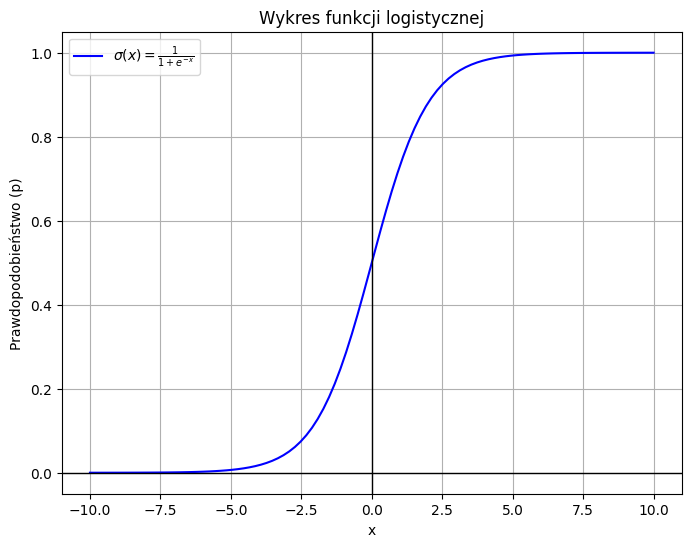

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji logistycznej
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Wartości x
x = np.linspace(-10, 10, 100)

# Obliczenie wartości funkcji logistycznej
y = sigmoid(x)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Wykres funkcji logistycznej')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Przykład obliczenia regresji logistycznej

Załóżmy, że chcemy przewidzieć prawdopodobieństwo, że klient kupi produkt ($Y = 1$),
na podstawie liczby obejrzanych stron ($X$).

Model regresji logistycznej ma postać:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Niech parametry modelu wynoszą:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Obliczmy prawdopodobieństwo zakupu, gdy klient obejrzał $X = 5$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Czyli model przewiduje, że **prawdopodobieństwo zakupu wynosi 50%**.

<br>

### 2. Dla $X = 8$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

Oznacza to, że klient, który obejrzał 8 stron, ma około **91.6% szans na zakup**.

<br>

### 3. Dla $X = 2$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 2)}} = \frac{1}{1 + e^{2.4}} \approx 0.083
$$

Zatem przy tylko 2 obejrzanych stronach, prawdopodobieństwo zakupu wynosi **8.3%**.

<br>

Widzimy, że wraz ze wzrostem liczby stron ($X$), funkcja logistyczna zwiększa
prawdopodobieństwo zakupu w sposób **nieliniowy**, ale zawsze utrzymuje wynik w zakresie $[0, 1]$.


### Różnica między regresją liniową a logistyczną

**1. Regresja liniowa**  

- Służy do przewidywania **wartości ciągłych**.  
- Model przyjmuje postać:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- Wynik $y$ może przyjmować dowolną wartość rzeczywistą.  

**2. Regresja logistyczna**  

- Służy do przewidywania **prawdopodobieństwa zdarzenia**, najczęściej klasyfikacji binarnej.  
- Model przyjmuje postać:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- Wynik $p$ zawsze mieści się w przedziale $[0,1]$.  

<br><br>

**Podsumowanie w skrócie**:

| Cecha                | Regresja liniowa         | Regresja logistyczna     |
|----------------------|------------------------|-------------------------|
| Typ zmiennej zależnej | Ciągła                 | Binarny (0/1)           |
| Wynik modelu         | Dowolna liczba rzeczywista | Prawdopodobieństwo [0,1] |
| Funkcja aktywacji    | Brak / liniowa         | Sigmoid                 |


### Przykład regresji logistycznej w kodzie Python

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


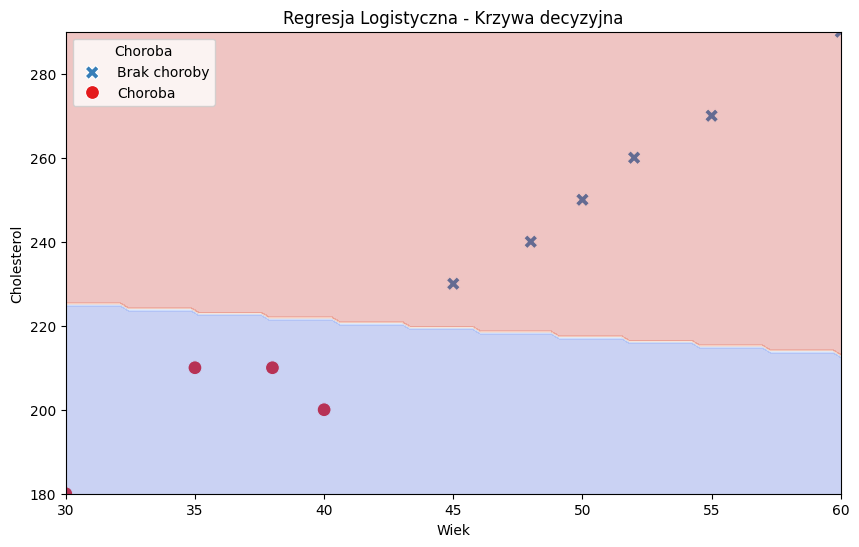

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Tworzymy przykładowe dane
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]  # Zmienne niezależne
y = df['Has_Disease']  # Zmienna zależna

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Wizualizacja
plt.figure(figsize=(10, 6))

# Wykres rozkładu danych z oznaczeniem choroby
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Wygenerowanie wartości predykcji na podstawie modelu
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykres krzywej decyzyjnej regresji logistycznej
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Regresja Logistyczna - Krzywa decyzyjna")
plt.xlabel('Wiek')
plt.ylabel('Cholesterol')
plt.legend(title='Choroba', loc='upper left', labels=["Brak choroby", "Choroba"])
plt.show()

### Metryki oceny jakości modeli w zadaniach klasyfikacyjnych

# 1. Dokładność (Accuracy)

Dokładność mierzy, jaki odsetek przewidywań modelu jest poprawny. Jeśli mamy:

- \(TP\) – prawdziwie pozytywne (True Positive)  
- \(TN\) – prawdziwie negatywne (True Negative)  
- \(FP\) – fałszywie pozytywne (False Positive)  
- \(FN\) – fałszywie negatywne (False Negative)  

to dokładność definiuje się jako:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precyzja (Precision)

Precyzja mówi, jaki odsetek obserwacji przewidzianych jako pozytywne faktycznie jest pozytywnych:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Czułość (Recall / Sensitivity)

Czasem warto też policzyć czułość, czyli zdolność modelu do wykrywania prawdziwych pozytywów:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

F1-score to miara łącząca precyzję i czułość w jedną wartość. Jest to **harmoniczna średnia** precyzji i czułości, która uwzględnia zarówno błędy fałszywie pozytywne, jak i fałszywie negatywne.  

Definicja:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

gdzie:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score jest szczególnie przydatny, gdy klasy są niezbalansowane, ponieważ uwzględnia zarówno precyzję, jak i czułość.

<br><br>

| Miara | Definicja | Wzór |
|-------|-----------|------|
| **Dokładność (Accuracy)** | Odsetek poprawnie sklasyfikowanych przypadków | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precyzja (Precision)** | Odsetek prawdziwych pozytywów spośród przewidzianych jako pozytywne | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Czułość (Recall / Sensitivity)** | Odsetek prawdziwych pozytywów wykrytych przez model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specyficzność (Specificity)** | Odsetek prawdziwych negatywów wykrytych przez model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | Harmoniczna średnia precyzji i czułości | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |



### Przykład wykorzystania metryk dla regresji logistycznej w kodzie Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # losowe 0 lub 1
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Sprawdzamy dokładność modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f'Dokładność modelu: {accuracy * 100:.2f}%')
print(f'Precyzja: {precision * 100:.2f}%')
print(f'Czułość: {recall * 100:.2f}%')
print(f'f1-score: {f1 * 100:.2f}%')


Dokładność modelu: 75.00%
Precyzja: 70.59%
Czułość: 100.00%
f1-score: 82.76%


## Zadanie
Dla zbioru danych `heart_disease_uci.csv` przeprować analizę DEA oraz regresję logistyczną dla cechy `num`.

### Opis kolumn

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.039382 -0.370721 -0.428727  0.014034   
age       0.239301  1.000000  0.230784 -0.086010 -0.349715  0.233550   
trestbps  0.039382  0.230784  1.000000  0.089484 -0.104747  0.161217   
chol     -0.370721 -0.086010  0.089484  1.000000  0.226047  0.047454   
thalch   -0.428727 -0.349715 -0.104747  0.226047  1.000000 -0.149401   
oldpeak   0.014034  0.233550  0.161217  0.047454 -0.149401  1.000000   
ca       -0.385881  0.219413  0.039092  0.152514  0.038207  0.218412   
num       0.273552  0.339596  0.113178 -0.230539 -0.349173  0.411588   

                ca       num  
id       -0.385881  0.273552  
age       0.219413  

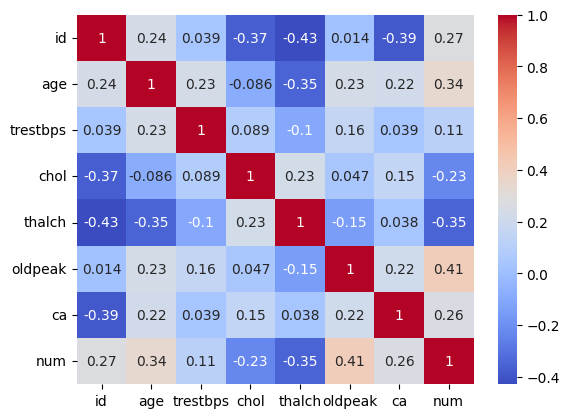

id 0
age 0
trestbps 28
chol 185
thalch 2
oldpeak 16
ca 128
num 0


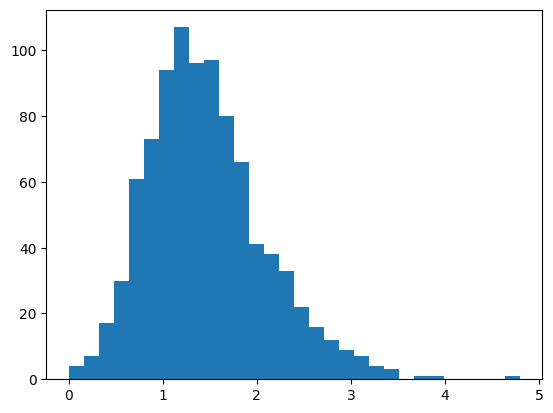

0.8043478260869565
0.7883211678832117
0.8709677419354839
0.8275862068965517


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

df = pd.read_csv('heart_disease_uci.csv')

print(df.isnull().sum())

df = df.fillna(df.median(numeric_only=True))

corr = df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, len(outliers))

X_inputs = df[['age', 'trestbps', 'chol', 'oldpeak', 'ca']]
Y_outputs = df[['thalch']]
X_inputs_norm = (X_inputs - X_inputs.min()) / (X_inputs.max() - X_inputs.min())
Y_outputs_norm = (Y_outputs - Y_outputs.min()) / (Y_outputs.max() - Y_outputs.min())
dea_score = Y_outputs_norm.mean(axis=1) / (X_inputs_norm.mean(axis=1) + 0.00001)
df['DEA_score'] = dea_score
plt.hist(df['DEA_score'], bins=30)
plt.show()

X = df.drop(columns=['id', 'num'], errors='ignore')
y = (df['num'] > 0).astype(int)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
